In [1]:
import numpy as np
import os,subprocess,sys
%matplotlib notebook
# %matplotlib widget
import matplotlib.pyplot as plt


plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'

In [2]:
%%sh 
make

make: Nothing to be done for 'all'.


In [3]:
_cpp=subprocess.check_output(["./rdof.run"]).decode(sys.stdout.encoding)

In [4]:
T=[]
h_tab=[]
g_tab=[]

T_int=[]
h_0=[]
h_1=[]
h_3=[]
g_0=[]
g_1=[]
g_3=[]
dh_0=[]
dh_1=[]
dh_3=[]

i=1
for _ in _cpp.split("\n")[:]:
    try:
        if _=="data":
            break
    except:
        pass

    i+=1
    tmp=_.split(',')
    T.append(float(tmp[0]))
    h_tab.append(float(tmp[1]))
    g_tab.append(float(tmp[2]))

for _ in _cpp.split("\n")[i+1:]:
    try:
        if _=="end":
            break
    except:
        pass

    tmp=_.split(',')
    T_int.append(float(tmp[0]))
    h_0.append(float(tmp[1]))
    h_1.append(float(tmp[2]))
    h_3.append(float(tmp[3]))
    g_0.append(float(tmp[4]))
    g_1.append(float(tmp[5]))
    g_3.append(float(tmp[6]))
    dh_0.append(float(tmp[7]))
    dh_1.append(float(tmp[8]))
    dh_3.append(float(tmp[9]))

<IPython.core.display.Javascript object>


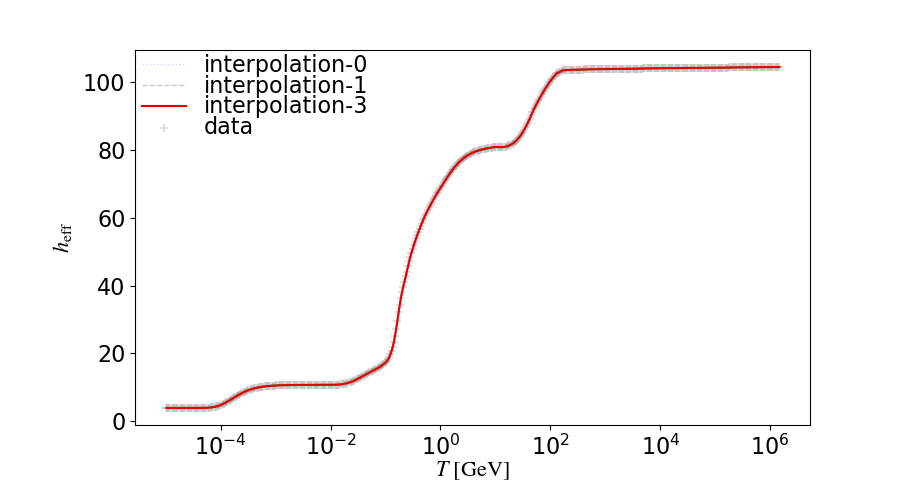

In [5]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)


sub.plot(T_int,h_0,linestyle=':',linewidth=1,alpha=0.2,c='xkcd:blue',label='interpolation-0')

sub.plot(T_int,h_1,linestyle='--',linewidth=1,alpha=0.2,c='xkcd:black',label='interpolation-1')

sub.plot(T_int,h_3,linestyle='-',linewidth=1.5,alpha=1,c='xkcd:red',label='interpolation-3')

sub.scatter(T,h_tab,alpha=0.3,c='xkcd:gray',marker='+',label='data')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$T ~ [{\rm GeV}]$')
sub.xaxis.set_label_coords(0.5, -0.09) 
sub.set_ylabel(r'$h_{\rm eff}$')
sub.yaxis.set_label_coords(-0.09,0.5) 
sub.set_xscale('log')
sub.set_yscale('linear')

fig.show()

<IPython.core.display.Javascript object>


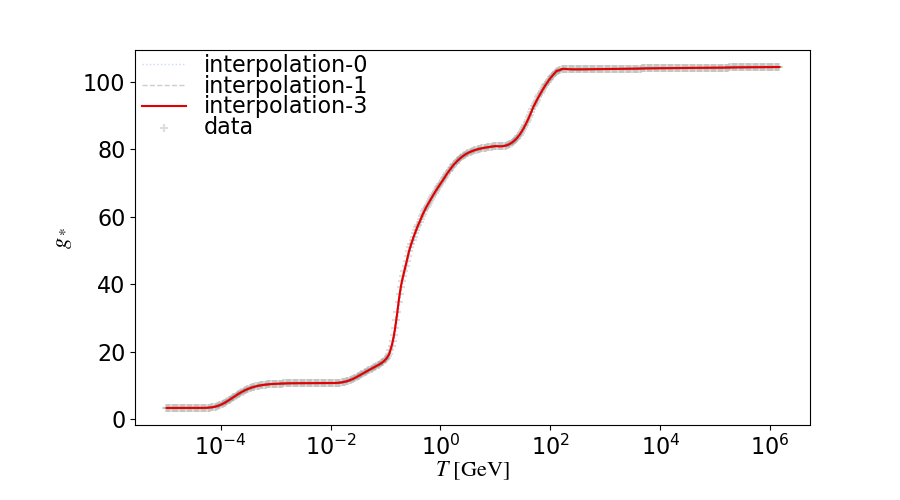

In [6]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

sub.plot(T_int,g_0,linestyle=':',linewidth=1,alpha=0.2,c='xkcd:blue',label='interpolation-0')

sub.plot(T_int,g_1,linestyle='--',linewidth=1,alpha=0.2,c='xkcd:black',label='interpolation-1')

sub.plot(T_int,g_3,linestyle='-',linewidth=1.5,alpha=1,c='xkcd:red',label='interpolation-3')

sub.scatter(T,g_tab,alpha=0.3,c='xkcd:gray',marker='+',label='data')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$T ~ [{\rm GeV}]$')
sub.xaxis.set_label_coords(0.5, -0.09) 
sub.set_ylabel(r'$g_{\rm *}$')
sub.yaxis.set_label_coords(-0.09,0.5) 
sub.set_xscale('log')
sub.set_yscale('linear')

fig.show()

<IPython.core.display.Javascript object>


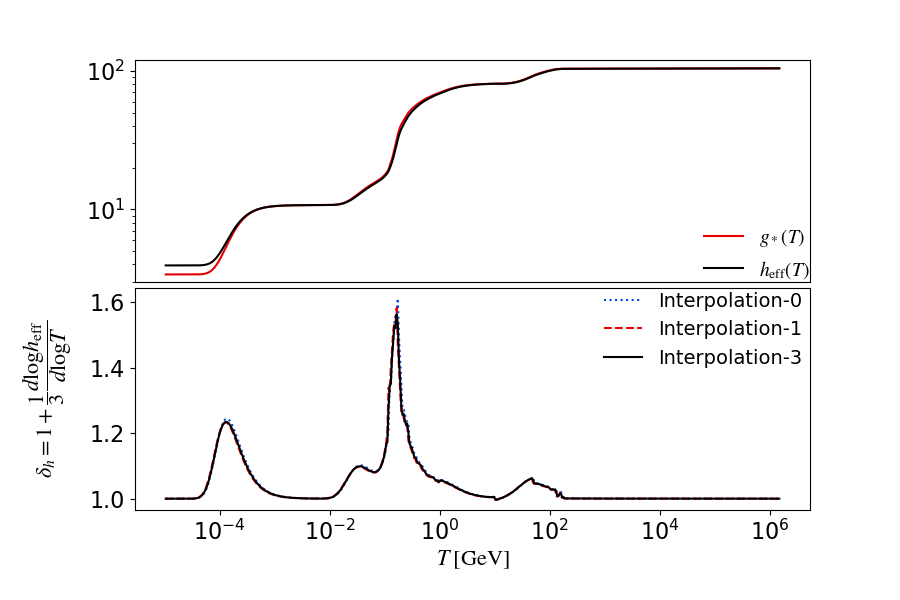

In [7]:
fig=plt.figure(figsize=(9,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.03)
fig.suptitle('')

sub = fig.add_subplot(2,1, 1)

sub.plot(T_int,g_3,linestyle='-',c='xkcd:red',label=r"$g_{\rm *} (T)$")
sub.plot(T_int,h_3,linestyle='-',c='xkcd:black',label=r"$h_{\rm eff} (T)$")


sub.legend(bbox_to_anchor=(1, 0.0),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='lower right',fontsize=14,framealpha=0)

sub.set_yscale('log')
sub.set_xscale('log')
sub.get_xaxis().set_visible(False)

sub.set_ylim(3,1.2e2)

sub = fig.add_subplot(2,1,2)

sub.plot(T_int,dh_0,linestyle=':',c='xkcd:blue',label=r"Interpolation-0")
sub.plot(T_int,dh_1,linestyle='--',c='xkcd:red',label=r"Interpolation-1")
sub.plot(T_int,dh_3,linestyle='-',c='xkcd:black',label=r"Interpolation-3")

sub.legend(bbox_to_anchor=(0.99, 0.99),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='upper right',fontsize=14,framealpha=0)

sub.set_ylabel(r'$\delta_h=1+\dfrac{1}{3} \dfrac{d \log h_{\rm eff}}{d \log T}$')
sub.yaxis.set_label_coords(-0.09,0.5) 

sub.set_yscale('linear')
sub.set_xscale('log')


sub.set_xlabel(r'$T \; [{\rm GeV}]$')
sub.xaxis.set_label_coords(0.5, -0.17) 



fig.show()